# 탐색적 데이터 분석

In [ ]:
# import libraries
import numpy as np
import scipy as sp
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt
import random

## 이상치 및 결측치 처리

### 데이터 읽기

In [ ]:
data_org = pd.read_csv('data04_stock.csv')    # 결측치가 없는 원 데이터
data = pd.read_csv('data05_stock_missing.csv')  # 결측치가 포함된 데이터

In [ ]:
data

,Price,val0001,val0002,val0003,val0004,val0005,val0006,val0007,val0008,val0009,...,val1991,val1992,val1993,val1994,val1995,val1996,val1997,val1998,val1999,val2000
0,Up,7.730,0.0,0.000,6.686,2.343,13.911,8.046,0.860,0.0,...,2.558,8.821,3.535,8.967,8.774,5.439,9.543,11.034,9.181,0.860
1,Up,8.200,0.0,0.943,6.858,1.726,11.958,8.084,0.943,0.0,...,3.355,7.909,5.485,9.105,8.587,4.020,9.837,10.642,9.901,0.547
2,Up,6.795,0.0,0.358,6.634,3.992,13.537,8.577,0.883,0.0,...,4.764,8.402,5.176,9.207,7.596,4.892,8.354,10.672,8.964,0.000
3,Up,4.646,0.0,1.212,5.838,4.213,13.294,7.651,0.000,0.0,...,2.922,8.830,3.779,9.541,7.969,4.749,7.960,10.888,9.076,0.525
4,Up,8.970,0.0,0.000,6.613,8.457,13.756,7.402,0.000,0.0,...,5.496,7.241,3.654,7.852,7.982,4.485,9.426,10.249,10.373,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Down,6.136,0.0,2.064,6.527,0.000,13.376,7.393,1.374,0.0,...,3.029,7.729,5.559,8.771,6.901,2.315,8.345,9.908,9.429,1.374
196,Down,7.828,0.0,0.737,6.651,1.415,14.668,9.751,2.585,0.0,...,3.585,9.332,6.197,8.853,8.218,5.799,8.486,10.933,9.368,0.000
197,Down,6.010,0.0,0.000,7.636,4.134,13.434,8.198,1.145,0.0,...,1.936,8.359,3.182,7.115,7.698,4.432,8.562,10.738,8.962,0.489
198,Down,7.585,0.0,0.000,5.989,1.409,13.420,8.987,0.000,0.0,...,4.099,9.510,4.545,10.240,7.298,5.209,8.890,11.634,10.108,0.499


In [ ]:
# 수치형 데이터만으로 분석
# 범주형도 가능하지만 좀 더 복잡함
data_org = data_org.drop('Price',axis=1)
data = data.drop('Price',axis=1)
data.head()

### 결측치 처리

In [ ]:
data.isna()  # 모든 값에 대하여 NA (결측치)가 존재하는지 확인

,val0001,val0002,val0003,val0004,val0005,val0006,val0007,val0008,val0009,val0010,...,val1991,val1992,val1993,val1994,val1995,val1996,val1997,val1998,val1999,val2000
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
196,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
197,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
198,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.isna().sum(axis=0)  # 각 변수에 대하여 결측치가 몇 개인지 확인

,0
val0001,0
val0002,5
val0003,7
val0004,0
val0005,0
...,...
val1996,0
val1997,0
val1998,5
val1999,0


In [ ]:
data.isna().sum(axis=1)  # 각 샘플에 대하여 결측치가 몇 개인지 확인

,0
0,0
1,0
2,0
3,0
4,0
...,...
195,37
196,0
197,0
198,0


In [ ]:
print('# of variables with missing:', (data.isna().sum(axis=0)>0).sum() )
print('# of samples with missing:', (data.isna().sum(axis=1)>0).sum() )
print('# of total missing:',data.isna().sum().sum() )

# of variables with missing: 176
# of samples with missing: 37
# of total missing: 1043


In [ ]:
# 표본 제거를 통한 결측치 처리
data_clean = data.dropna(axis=0)
print( data_clean.shape )
print('# of total missing:',data_clean.isna().sum().sum() )

(163, 2000)
# of total missing: 0


In [ ]:
# 변수 제거를 통한 결측치 처리
data_clean = data.dropna(axis=1)
print( data_clean.shape )
print('# of total missing:',data_clean.isna().sum().sum() )

(200, 1824)
# of total missing: 0


In [ ]:
data.mean()

,0
val0001,7.182520
val0002,0.104718
val0003,0.501575
val0004,6.310105
val0005,2.885235
...,...
val1996,4.396070
val1997,8.612665
val1998,10.430769
val1999,9.741645


In [ ]:
# 결측치 대치
data_clean = data.fillna( data.mean() )
print( data_clean.shape )
print('# of total missing:',data_clean.isna().sum().sum() )

(200, 2000)
# of total missing: 0


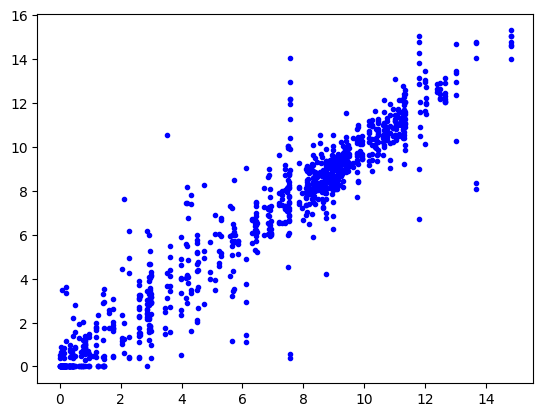

In [ ]:
# 대치값과 원래값의 비교
naidx = data.isna().to_numpy().reshape(np.prod(data.shape))
imputed = data_clean.to_numpy().reshape(np.prod(data.shape))[naidx]
original = data_org.to_numpy().reshape(np.prod(data.shape))[naidx]
plt.plot(imputed,original,'b.')

### 이상치 검출

In [ ]:
data = data_org.copy()  # 결측치가 없는 데이터에서 시작, 결측치 처리 후 시작도 가능
data

,val0001,val0002,val0003,val0004,val0005,val0006,val0007,val0008,val0009,val0010,...,val1991,val1992,val1993,val1994,val1995,val1996,val1997,val1998,val1999,val2000
0,7.730,0.0,0.000,6.686,2.343,13.911,8.046,0.860,0.0,9.630,...,2.558,8.821,3.535,8.967,8.774,5.439,9.543,11.034,9.181,0.860
1,8.200,0.0,0.943,6.858,1.726,11.958,8.084,0.943,0.0,10.010,...,3.355,7.909,5.485,9.105,8.587,4.020,9.837,10.642,9.901,0.547
2,6.795,0.0,0.358,6.634,3.992,13.537,8.577,0.883,0.0,9.604,...,4.764,8.402,5.176,9.207,7.596,4.892,8.354,10.672,8.964,0.000
3,4.646,0.0,1.212,5.838,4.213,13.294,7.651,0.000,0.0,10.049,...,2.922,8.830,3.779,9.541,7.969,4.749,7.960,10.888,9.076,0.525
4,8.970,0.0,0.000,6.613,8.457,13.756,7.402,0.000,0.0,9.277,...,5.496,7.241,3.654,7.852,7.982,4.485,9.426,10.249,10.373,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,6.136,0.0,2.064,6.527,0.000,13.376,7.393,1.374,0.0,8.904,...,3.029,7.729,5.559,8.771,6.901,2.315,8.345,9.908,9.429,1.374
196,7.828,0.0,0.737,6.651,1.415,14.668,9.751,2.585,0.0,9.463,...,3.585,9.332,6.197,8.853,8.218,5.799,8.486,10.933,9.368,0.000
197,6.010,0.0,0.000,7.636,4.134,13.434,8.198,1.145,0.0,8.858,...,1.936,8.359,3.182,7.115,7.698,4.432,8.562,10.738,8.962,0.489
198,7.585,0.0,0.000,5.989,1.409,13.420,8.987,0.000,0.0,9.604,...,4.099,9.510,4.545,10.240,7.298,5.209,8.890,11.634,10.108,0.499


In [ ]:
sp.stats.zscore(data)   # z-score, (value-mean)/std

array([[ 0.51058038, -0.40312289, -0.58152622, ...,  1.06784847,
        -1.04957814,  0.34478533],
       [ 0.94890283, -0.40312289,  0.47908655, ...,  0.37781237,
         0.29832697,  0.01179303],
       [-0.36140153, -0.40312289, -0.17887577, ...,  0.43062125,
        -1.45582176, -0.57014558],
       ...,
       [-1.09349329, -0.40312289, -0.58152622, ...,  0.5468008 ,
        -1.45956594, -0.04991161],
       [ 0.37535324, -0.40312289, -0.58152622, ...,  2.12402617,
         0.68584969, -0.03927288],
       [ 0.32126238, -0.40312289, -0.58152622, ...,  0.80556434,
        -0.55721836, -0.57014558]])

In [ ]:
# 3sigma (99.73%) 바깥 쪽의 것을 이상치로 검출
outlier_idx = np.abs( sp.stats.zscore(data) ) > 3
print('# of outliers:', outlier_idx.sum().sum() )

# of outliers: 3468


In [ ]:
col_idx = data.columns.get_loc('val0002')
print(col_idx)


1


In [ ]:
# outlier_idx['val0002'].sum()
outlier_count = outlier_idx[:, col_idx].sum()
print(outlier_count)

4


<Axes: >

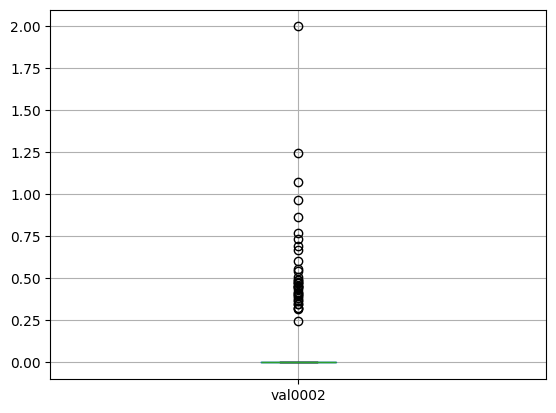

In [ ]:
data.boxplot('val0002')

array([[<Axes: title={'center': 'val0002'}>]], dtype=object)

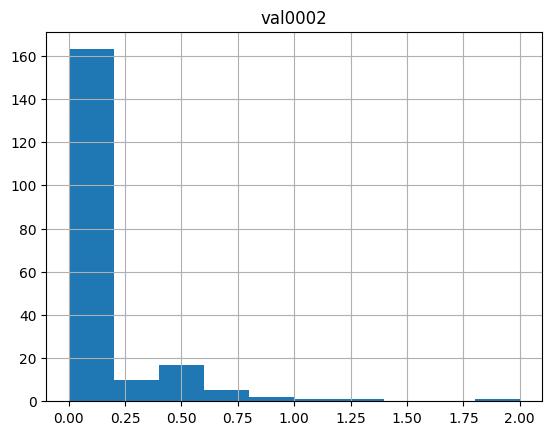

In [ ]:
data.hist('val0002')

## 통계분석

###데이터 읽기

In [ ]:
df = pd.read_csv('data03_carseat.csv')

In [ ]:
df

,Sales,SalesBin,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Dummy01,Dummy02,Dummy03,Dummy04,Dummy05,Dummy06
0,9.50,High,138,73,11,276,120,Bad,42,17,Yes,Yes,38,7,8,16,105,41
1,11.22,High,111,48,16,260,83,Good,65,10,Yes,Yes,21,5,23,12,155,22
2,10.06,High,113,35,10,269,80,Medium,59,12,Yes,Yes,29,7,3,26,195,27
3,7.40,Low,117,100,4,466,97,Medium,55,14,Yes,Yes,81,7,40,23,131,10
4,4.15,Low,141,64,3,340,128,Bad,38,13,Yes,No,71,7,7,11,129,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5.58,Low,134,25,10,237,148,Medium,59,13,Yes,Yes,85,6,26,26,163,12
96,9.48,High,147,42,10,407,132,Good,73,16,No,Yes,49,9,6,26,104,12
97,7.45,Low,161,82,5,287,129,Bad,33,16,Yes,Yes,13,5,32,25,178,5
98,12.49,High,122,77,24,382,127,Good,36,16,No,Yes,82,5,18,27,119,46


###T-검정

In [ ]:
y = df['Sales']
x = df['Urban']
y1 = y[x=='Yes']
y2 = y[x=='No']
sp.stats.ttest_ind(y1,y2)
# print(sp.stats.ttest_ind(y1,y2))

TtestResult(statistic=np.float64(-1.2458389877357352), pvalue=np.float64(0.21579373279136355), df=np.float64(98.0))

<Axes: title={'center': 'Sales'}, xlabel='Urban'>

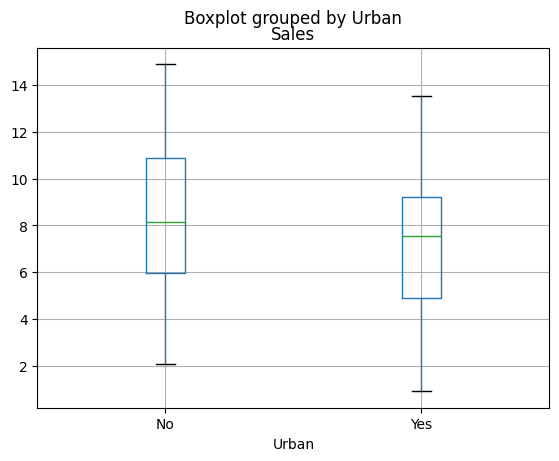

In [ ]:
df.boxplot('Sales',by='Urban')

### F-검정, ANOVA

In [ ]:
y = df['Sales']
x = df['ShelveLoc']
y1 = y[x=='Good']
y2 = y[x=='Medium']
y3 = y[x=='Bad']
sp.stats.f_oneway(y1,y2,y3)

F_onewayResult(statistic=30.84136704786565, pvalue=4.292792406043025e-11)

<Axes: title={'center': 'Sales'}, xlabel='ShelveLoc'>

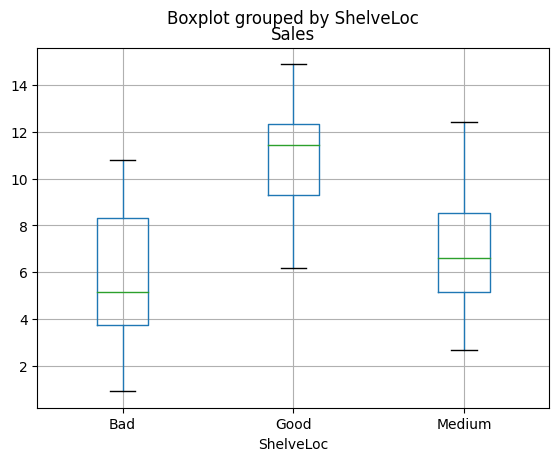

In [ ]:
df.boxplot('Sales',by='ShelveLoc')

###상관검정

In [ ]:
y = df['Sales']
x = df['CompPrice']
sp.stats.pearsonr(y,x)

PearsonRResult(statistic=np.float64(0.21681873029884516), pvalue=np.float64(0.030252170801711324))

<Axes: xlabel='Sales', ylabel='CompPrice'>

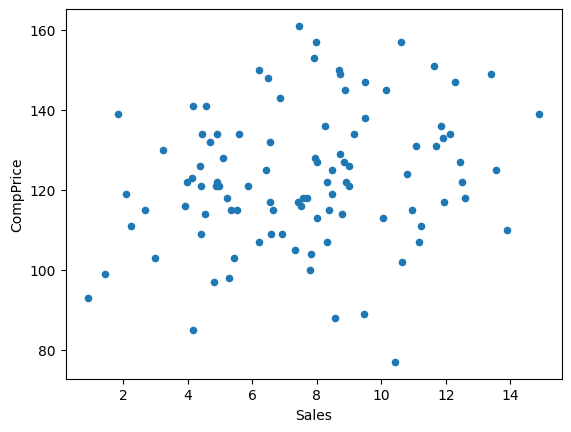

In [ ]:
df.plot.scatter('Sales','CompPrice')

###카이제곱 검정

In [ ]:
# chisq test
y = df['SalesBin']
x = df['US']
tbl = pd.crosstab(x,y)
scipy.stats.chi2_contingency(tbl)

Chi2ContingencyResult(statistic=3.6288178902779946, pvalue=0.056787137719661575, dof=1, expected_freq=array([[17.1, 20.9],
       [27.9, 34.1]]))

In [ ]:
tbl

SalesBin,High,Low
US,,
No,12,26
Yes,33,29


###모든 변수에 대해서 한 번에 수행

In [ ]:
# all at once
Y = df['Sales']
X = df.iloc[:,2:-6]
out = pd.DataFrame({"Var":X.columns})
slist = np.zeros(out.shape[0])
plist = np.zeros(out.shape[0])
for i in range(out.shape[0]):
    y = Y
    x = X.iloc[:,i]
    if (x.dtype=='O') and (y.dtype=='O'):  # Object type
        r = sp.stats.chi2_contingency( pd.crosstab(x,y) )
        s = r[0]
        p = r[1]
    elif (x.dtype!='O') and (y.dtype!='O'):
        r = sp.stats.pearsonr(x,y)
        s = r[0]
        p = r[1]
    else:
        if (x.dtype!='O') and (y.dtype=='O'):
            x, y = y, x
        # now x is categorical, y is numeric
        n = x.unique()
        ylist = []
        for j in range(len(n)):
            ylist.append(y[x==n[j]])
        if len(n)==2:
            r = sp.stats.ttest_ind(*ylist)
            s = r.statistic
            p = r.pvalue
        else:
            r = sp.stats.f_oneway(*ylist)
            s = r.statistic
            p = r.pvalue
    slist[i] = s
    plist[i] = p
out['stat'] = slist
out['pvalue'] = plist

In [ ]:
out

,Var,stat,pvalue
0,CompPrice,0.216819,3.025217e-02
1,Income,0.212973,3.338467e-02
2,Advertising,0.333760,6.900811e-04
3,Population,0.117909,2.426660e-01
4,Price,-0.344771,4.435662e-04
5,ShelveLoc,30.841367,4.292792e-11
6,Age,-0.285571,3.976277e-03
7,Education,0.016902,8.674470e-01
8,Urban,-1.245839,2.157937e-01
9,US,1.993680,4.896627e-02


###파일로 출력

In [ ]:
# write to a file
out.to_csv('analysis_result.csv',index=False)

## 연습문제

1. data05_stock_missing에서 결측치를 각 변수의 평균을 이용하여 대치하였을 때, 실제값(data04_stock)과의 MSE(제곱에러의 평균)은 어떻게 주어지는가? 각 변수의 중간값의 이용하여 대치하였을 때 MSE는 어떻게 주어지는가?

In [ ]:
# import libraries
import numpy as np
import scipy as sp
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt
import random

In [ ]:
data_org = pd.read_csv('data04_stock.csv')    # 결측치가 없는 원 데이터
data = pd.read_csv('data05_stock_missing.csv')  # 결측치가 포함된 데이터
data.head()

,Price,val0001,val0002,val0003,val0004,val0005,val0006,val0007,val0008,val0009,...,val1991,val1992,val1993,val1994,val1995,val1996,val1997,val1998,val1999,val2000
0,Up,7.730,0.0,0.000,6.686,2.343,13.911,8.046,0.860,0.0,...,2.558,8.821,3.535,8.967,8.774,5.439,9.543,11.034,9.181,0.860
1,Up,8.200,0.0,0.943,6.858,1.726,11.958,8.084,0.943,0.0,...,3.355,7.909,5.485,9.105,8.587,4.020,9.837,10.642,9.901,0.547
2,Up,6.795,0.0,0.358,6.634,3.992,13.537,8.577,0.883,0.0,...,4.764,8.402,5.176,9.207,7.596,4.892,8.354,10.672,8.964,0.000
3,Up,4.646,0.0,1.212,5.838,4.213,13.294,7.651,0.000,0.0,...,2.922,8.830,3.779,9.541,7.969,4.749,7.960,10.888,9.076,0.525
4,Up,8.970,0.0,0.000,6.613,8.457,13.756,7.402,0.000,0.0,...,5.496,7.241,3.654,7.852,7.982,4.485,9.426,10.249,10.373,0.000


In [ ]:
data_org.head()

,Price,val0001,val0002,val0003,val0004,val0005,val0006,val0007,val0008,val0009,...,val1991,val1992,val1993,val1994,val1995,val1996,val1997,val1998,val1999,val2000
0,Up,7.730,0.0,0.000,6.686,2.343,13.911,8.046,0.860,0.0,...,2.558,8.821,3.535,8.967,8.774,5.439,9.543,11.034,9.181,0.860
1,Up,8.200,0.0,0.943,6.858,1.726,11.958,8.084,0.943,0.0,...,3.355,7.909,5.485,9.105,8.587,4.020,9.837,10.642,9.901,0.547
2,Up,6.795,0.0,0.358,6.634,3.992,13.537,8.577,0.883,0.0,...,4.764,8.402,5.176,9.207,7.596,4.892,8.354,10.672,8.964,0.000
3,Up,4.646,0.0,1.212,5.838,4.213,13.294,7.651,0.000,0.0,...,2.922,8.830,3.779,9.541,7.969,4.749,7.960,10.888,9.076,0.525
4,Up,8.970,0.0,0.000,6.613,8.457,13.756,7.402,0.000,0.0,...,5.496,7.241,3.654,7.852,7.982,4.485,9.426,10.249,10.373,0.000


In [ ]:
data_org = data_org.drop('Price',axis=1)
data = data.drop('Price',axis=1)

In [ ]:
data.isna().sum(axis=0)

,0
Price,0
val0001,0
val0002,5
val0003,7
val0004,0
...,...
val1996,0
val1997,0
val1998,5
val1999,0


In [ ]:
data.isna().sum(axis=1)

,0
0,0
1,0
2,0
3,0
4,0
...,...
195,37
196,0
197,0
198,0


In [ ]:
print('# of variables with missing:', (data.isna().sum(axis=0)>0).sum() )
print('# of samples with missing:', (data.isna().sum(axis=1)>0).sum() )
print('# of total missing:',data.isna().sum().sum() )

# of variables with missing: 176
# of samples with missing: 37
# of total missing: 1043


In [ ]:
# 결측치 대치 - 평균 값으로
data_clean_1 = data.fillna( data.mean() )
print( data_clean_1.shape )
print('# of total missing:',data_clean_1.isna().sum().sum() )

(200, 2000)
# of total missing: 0


In [ ]:
# 1. 위치 찾기: 어디가 결측치였는지 True/False 마스크 생성
# .isna()는 결측치 위치를 True로 표시해 줍니다.
missing_mask = data.isna()

print("--- 1. 결측치 위치 마스크 ---")
print(missing_mask)
print("\n" + "="*30 + "\n")


# 2. 값 추출: 마스크를 이용해 필요한 값들만 뽑아내기

# 2-1. 실제 정답 데이터(data_org)에서 원래 값 추출
# .values는 데이터프레임을 NumPy 배열로 변환합니다.
# NumPy 배열에 boolean 마스크를 적용하면 True 위치의 값만 1차원 배열로 반환됩니다.
original_values = data_org.values[missing_mask.values]

# 2-2. 평균으로 대치된 데이터(data_clean_1)에서 채워진 값 추출
imputed_values = data_clean_1.values[missing_mask.values]

print("--- 2. 추출된 값들 ---")
# print("원래 실제값:", original_values)
# print("평균으로 채운 값:", imputed_values)
print("\n" + "="*30 + "\n")


# 3. MSE 계산: 두 가지 방법



# 방법 B: NumPy를 이용해 직접 계산 (개념 이해에 도움)
mse_manual = np.mean((original_values - imputed_values) ** 2)

print("--- 3. 최종 MSE 계산 결과 ---")
print(f"실제값과의 MSE는 {mse_manual:.4f} 입니다.")
# print(f"(직접 계산한 MSE: {mse_manual:.4f})")

--- 1. 결측치 위치 마스크 ---
     val0001  val0002  val0003  val0004  val0005  val0006  val0007  val0008  \
0      False    False    False    False    False    False    False    False   
1      False    False    False    False    False    False    False    False   
2      False    False    False    False    False    False    False    False   
3      False    False    False    False    False    False    False    False   
4      False    False    False    False    False    False    False    False   
..       ...      ...      ...      ...      ...      ...      ...      ...   
195    False    False    False    False    False    False    False    False   
196    False    False    False    False    False    False    False    False   
197    False    False    False    False    False    False    False    False   
198    False    False    False    False    False    False    False    False   
199    False    False    False    False    False    False    False    False   

     val0009  val0010  ...  v

In [ ]:
# 결측치 대치 - 중간 값으로
data_clean_2 = data.fillna( data.median() )
print( data_clean_2.shape )
print('# of total missing:',data_clean_2.isna().sum().sum() )

(200, 2000)
# of total missing: 0


In [ ]:
# 1. 위치 찾기: 어디가 결측치였는지 True/False 마스크 생성
# .isna()는 결측치 위치를 True로 표시해 줍니다.
missing_mask = data.isna()

print("--- 1. 결측치 위치 마스크 ---")
print(missing_mask)
print("\n" + "="*30 + "\n")


# 2. 값 추출: 마스크를 이용해 필요한 값들만 뽑아내기

# 2-1. 실제 정답 데이터(data_org)에서 원래 값 추출
# .values는 데이터프레임을 NumPy 배열로 변환합니다.
# NumPy 배열에 boolean 마스크를 적용하면 True 위치의 값만 1차원 배열로 반환됩니다.
original_values = data_org.values[missing_mask.values]

# 2-2. 중간값으로 대치된 데이터(data_clean_2)에서 채워진 값 추출
imputed_values = data_clean_2.values[missing_mask.values]

print("--- 2. 추출된 값들 ---")
# print("원래 실제값:", original_values)
# print("중간값으로 채운 값:", imputed_values)
print("\n" + "="*30 + "\n")


# 3. MSE 계산: 두 가지 방법



# 방법 B: NumPy를 이용해 직접 계산 (개념 이해에 도움)
mse_manual = np.mean((original_values - imputed_values) ** 2)

print("--- 3. 최종 MSE 계산 결과 ---")
print(f"실제값과의 MSE는 {mse_manual:.4f} 입니다.")
# print(f"(직접 계산한 MSE: {mse_manual:.4f})")

--- 1. 결측치 위치 마스크 ---
     val0001  val0002  val0003  val0004  val0005  val0006  val0007  val0008  \
0      False    False    False    False    False    False    False    False   
1      False    False    False    False    False    False    False    False   
2      False    False    False    False    False    False    False    False   
3      False    False    False    False    False    False    False    False   
4      False    False    False    False    False    False    False    False   
..       ...      ...      ...      ...      ...      ...      ...      ...   
195    False    False    False    False    False    False    False    False   
196    False    False    False    False    False    False    False    False   
197    False    False    False    False    False    False    False    False   
198    False    False    False    False    False    False    False    False   
199    False    False    False    False    False    False    False    False   

     val0009  val0010  ...  v

2. data04_stock은 주가가 상승한 날과 하락한 날에 대하여 관련된 변수의 값을 모아놓은 파일이다. 2000개의 관련 변수 중에서 주가의 변동과 유의미하게 연관된 변수를 선정하고자.<br>
(1) SMD의 절대값이 큰 순서대로 변수 10개를 선정하시오.<br>
(2) p 값이 0.01보다 작은 변수는 모두 몇 개인가?

In [ ]:
# import libraries
import numpy as np
import scipy as sp
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt
import random

In [ ]:
data_stock = pd.read_csv('data04_stock.csv')    # 결측치가 없는 원 데이터
data_stock.head()

,Price,val0001,val0002,val0003,val0004,val0005,val0006,val0007,val0008,val0009,...,val1991,val1992,val1993,val1994,val1995,val1996,val1997,val1998,val1999,val2000
0,Up,7.730,0.0,0.000,6.686,2.343,13.911,8.046,0.860,0.0,...,2.558,8.821,3.535,8.967,8.774,5.439,9.543,11.034,9.181,0.860
1,Up,8.200,0.0,0.943,6.858,1.726,11.958,8.084,0.943,0.0,...,3.355,7.909,5.485,9.105,8.587,4.020,9.837,10.642,9.901,0.547
2,Up,6.795,0.0,0.358,6.634,3.992,13.537,8.577,0.883,0.0,...,4.764,8.402,5.176,9.207,7.596,4.892,8.354,10.672,8.964,0.000
3,Up,4.646,0.0,1.212,5.838,4.213,13.294,7.651,0.000,0.0,...,2.922,8.830,3.779,9.541,7.969,4.749,7.960,10.888,9.076,0.525
4,Up,8.970,0.0,0.000,6.613,8.457,13.756,7.402,0.000,0.0,...,5.496,7.241,3.654,7.852,7.982,4.485,9.426,10.249,10.373,0.000


In [ ]:
# --- 1. 데이터 분리 ---
# Y는 그룹을 나누는 기준('Price'), X는 분석할 변수들
Y = data_stock['Price']
X = data_stock.drop('Price', axis=1)

# 'Price'가 'Up'인 그룹과 'Down'인 그룹으로 X 데이터를 분리
X_up = X[Y == 'Up']
X_down = X[Y == 'Down']

# --- 2. 반복 계산을 위한 준비 ---
# 결과를 저장할 빈 리스트 생성
smd_list = []
p_value_list = []

# --- 3. 2000개 변수에 대해 반복하며 통계량 계산 ---
# X.columns는 'val0001', 'val0002', ... 등 모든 변수 이름을 담고 있음
for var in X.columns:
    # 현재 변수(var)에 해당하는 데이터만 선택
    up_data = X_up[var]
    down_data = X_down[var]

    # ---------------------------------------------
    # (A) p-value 계산 (T-test 이용)
    # ---------------------------------------------
    # ttest_ind 함수는 두 그룹의 데이터를 받아 t-통계량과 p-value를 반환
    # '*'는 up_data와 down_data를 함수의 인자로 풀어서 넣어주라는 의미
    t_stat, p_val = sp.stats.ttest_ind(up_data, down_data)
    p_value_list.append(p_val)

    # ---------------------------------------------
    # (B) SMD(Standardized Mean Difference) 계산
    # ---------------------------------------------
    # 각 그룹의 샘플 수(n), 평균(mean), 표준편차(std) 계산
    n_up, n_down = len(up_data), len(down_data)
    mean_up, mean_down = up_data.mean(), down_data.mean()
    std_up, std_down = up_data.std(), down_data.std()

    # 합동 표준편차(Pooled Standard Deviation) 계산
    # np.sqrt는 제곱근을 계산하는 함수
    pooled_std = np.sqrt( ((n_up - 1) * std_up**2 + (n_down - 1) * std_down**2) / (n_up + n_down - 2) )

    # SMD 계산
    smd = (mean_up - mean_down) / pooled_std
    smd_list.append(smd)

# --- 4. 결과 정리 ---
# 계산된 결과를 보기 좋은 데이터프레임으로 합치기
results_df = pd.DataFrame({
    'Variable': X.columns,
    'SMD': smd_list,
    'p_value': p_value_list
})

# SMD의 절대값을 계산하여 새로운 열로 추가
results_df['SMD_abs'] = np.abs(results_df['SMD'])


# --- 5. 문제 답변 ---

# (1) SMD의 절대값이 큰 순서대로 변수 10개를 선정하시오.
print("--- (1) SMD 절대값 기준 상위 10개 변수 ---")
# sort_values()로 SMD_abs 열을 내림차순(ascending=False)으로 정렬하고, head(10)으로 상위 10개 선택
top_10_smd_vars = results_df.sort_values(by='SMD_abs', ascending=False).head(10)
print(top_10_smd_vars)
print("-" * 50)


# (2) p 값이 0.01보다 작은 변수는 모두 몇 개인가?
print("--- (2) p-value가 0.01보다 작은 변수의 개수 ---")
# p_value 열이 0.01보다 작은 행만 선택
significant_vars = results_df[results_df['p_value'] < 0.01]
# 그렇게 선택된 행의 개수(len)를 셉니다.
num_significant_vars = len(significant_vars)
print(f"p-value가 0.01보다 작은 변수는 총 {num_significant_vars}개 입니다.")

/tmp/ipython-input-207597634.py:43: RuntimeWarning: invalid value encountered in scalar divide
  smd = (mean_up - mean_down) / pooled_std


--- (1) SMD 절대값 기준 상위 10개 변수 ---
     Variable       SMD   p_value   SMD_abs
23    val0024  0.647178  0.000008  0.647178
187   val0188 -0.626356  0.000016  0.626356
1418  val1419 -0.617179  0.000021  0.617179
453   val0454 -0.588590  0.000047  0.588590
282   val0283 -0.581731  0.000057  0.581731
1410  val1411 -0.579197  0.000061  0.579197
163   val0164  0.573437  0.000072  0.573437
1419  val1420 -0.568635  0.000082  0.568635
869   val0870  0.567801  0.000084  0.567801
432   val0433 -0.550196  0.000137  0.550196
--------------------------------------------------
--- (2) p-value가 0.01보다 작은 변수의 개수 ---
p-value가 0.01보다 작은 변수는 총 118개 입니다.
